# Lektion 6

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt

interaktiv

In [2]:
#%matplotlib notebook

für den Druck

In [3]:
%matplotlib inline 

## Schleifen

Python beachtet Leerzeichen

In [ ]:
summe = 0
for j in range(10):
    summe = summe + j
summe

Probe

In [ ]:
np.arange(10).sum()

In [ ]:
for j in range(1, 6):
    wert = sin(2*pi/j)
    print(wert)

In [ ]:
from IPython.display import display, Image

In [ ]:
for j in range(1, 11):
    wert = sin(2*pi/j)
    display((2*pi/j, wert))

## Mehrere Zeichnungen in einem Bild

In [ ]:
fig = plt.figure()
for j in range(4):
    ax = fig.add_subplot(221+j)
    ax.contour(X, Y, hn(X, Y), [.005*(j-2)])
    ax.set_aspect('equal')
fig.savefig('dateiname.png')

In [ ]:
Image('dateiname.png')

## Funktionen

In [4]:
x = Symbol('x')
xn = np.arange(6)
zn = 1j + xn
x, xn, zn

(x,
 array([0, 1, 2, 3, 4, 5]),
 array([ 0.+1.j,  1.+1.j,  2.+1.j,  3.+1.j,  4.+1.j,  5.+1.j]))

In [5]:
def f(x):
    return x**3 + 2*x + 15

In [6]:
f(0)

In [7]:
f(0.)

In [8]:
f(0+0j)

(15+0j)

In [9]:
f(2*x)

In [10]:
f(xn)

array([ 15,  18,  27,  48,  87, 150])

Duck typing:  

“When I see a bird that walks like a duck and swims like a duck and quacks like a duck, I call that bird a duck.”

– James Whitcomb Riley

In [11]:
def g(x):
    return sin(x) + f(x)

In [12]:
g(-2*x)

In [13]:
g(pi)

In [14]:
g(3.1415)

In [15]:
# g(xn)  zeigt einen AttributeError

In [16]:
def h(x):
    try:
        res = g(x)
    except AttributeError:
        res = np.sin(x) + f(x)
    return res

In [17]:
h(pi)

In [18]:
h(xn)

/az076/anaconda3/envs/compana16/lib/python3.5/site-packages/sympy/core/sympify.py:282: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rational=rational) for x in a])


array([  15.        ,   18.84147098,   27.90929743,   48.14112001,
         86.2431975 ,  149.04107573])

In [19]:
def abss(x):
    if x > 0:
        return x
    else:
        return -x

In [20]:
abss(-5)

In [21]:
# abss(x)  # TypeError

## Zusammenfassen

In [22]:
x = Symbol('x')

In [23]:
a = (x**4-3*x**2+5)*exp(x**2)*sin(x)
a

In [24]:
da = diff(a, x, 3)
da

In [25]:
da.expand()

In [26]:
da.expand().collect(exp(x**2))

In [27]:
rcollect(collect(da.expand(), exp(x**2)), cos(x), sin(x))

## Trigonometrische Funktionen

In [28]:
x = Symbol('x')
y = Symbol('y')

In [29]:
a = cos(x+y)

In [30]:
A = expand(a, trig=True)
A

In [31]:
trigsimp(A)

In [32]:
b = sin(x) + sin(y)
b

In [33]:
from sympy.simplify.fu import TR9, TR2

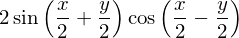

In [34]:
TR9(b)

In [35]:
# TR9??

In [36]:
c = tan(x)**2 + 1
c

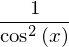

In [37]:
c.trigsimp()

In [38]:
d = tan(3*x)
d.simplify()

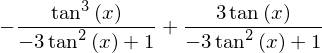

In [39]:
d.expand(trig=True)

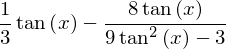

In [40]:
d.expand(trig=True).ratsimp()

In [41]:
e = tan(x) + cot(y)
e.simplify()

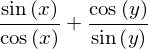

In [42]:
e.subs({ tan(x): sin(x)/cos(x), cot(y): cos(y)/sin(y)})  # Verletzungsgefahr

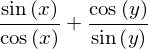

In [43]:
e1 = TR2(e)
e1

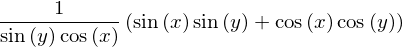

In [44]:
e2 = e1.ratsimp()
e2

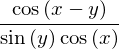

In [45]:
num, den = numer(e2), denom(e2)
num1 = num.trigsimp()
num1/den

## Potenzfunktionen

In [46]:
f = x**Rational(1,3)

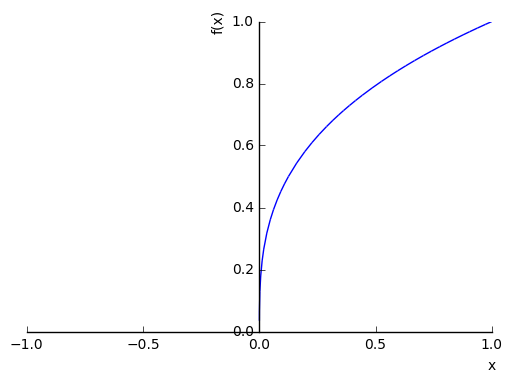

In [47]:
plot(f, (x, -1, 1));

In [48]:
im(f.subs(x, -1))

In [49]:
sign?

In [50]:
g = sign(x)*abs(x)**Rational(1,3)
g

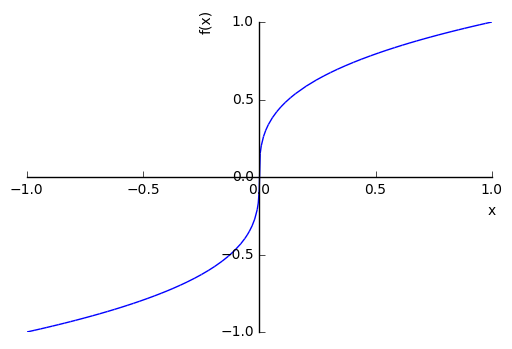

In [51]:
plot(g, (x,-1,1));

## Integration

In [52]:
x = Symbol('x')

In [53]:
f = sin(x)/x

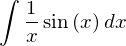

In [54]:
I1 = Integral(f, x)
I1

In [55]:
I1.doit()

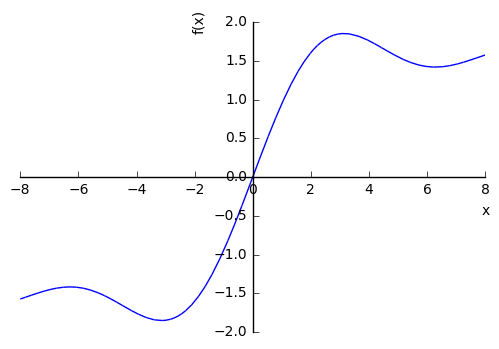

In [56]:
plot(Si(x), (x, -8, 8));

In [57]:
Si(6.)

In [58]:
Integral(sin(x)/x, (x,0,6)).n()

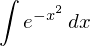

In [59]:
I3 = Integral(exp(-x**2), x)
I3

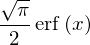

In [60]:
I3.doit()

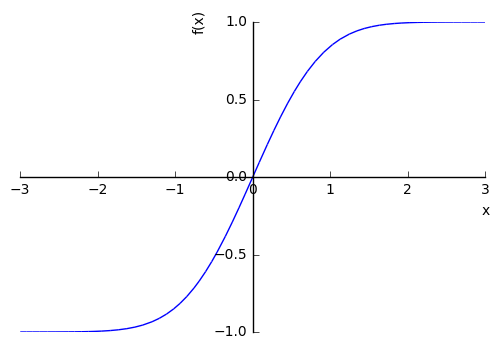

In [61]:
plot(erf(x), (x, -3, 3));

In [62]:
f = (1-x**2)**Rational(-3,2)

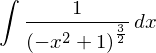

In [63]:
I4 = Integral(f, x)
I4

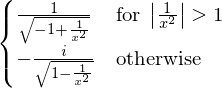

In [64]:
tmp = I4.doit()
tmp

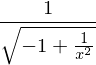

In [65]:
F = tmp.args[0][0]
F

In [66]:
F.diff(x) == f

False

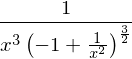

In [67]:
F.diff(x)

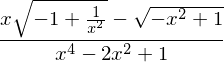

In [68]:
(F.diff(x) - f).radsimp().expand().ratsimp()

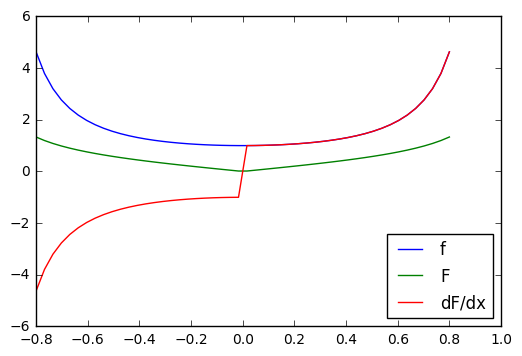

In [69]:
xn = np.linspace(-.8, .8)
fn = lambdify(x, f)
Fn = lambdify(x, F, 'numpy')
dFn = lambdify(x, F.diff(x), 'numpy')
plt.plot(xn, fn(xn), label='f')
plt.plot(xn, Fn(xn), label='F')
plt.plot(xn, dFn(xn), label='dF/dx')
plt.legend(loc='lower right');

Die Stammfunktion ist falsch.  Wir waren aber gewarnt.

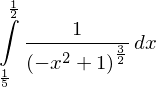

In [70]:
I5 = Integral(f, (x, Rational(1,5), Rational(1,2)))
I5

In [71]:
#I5.doit()  # AttribureError

In [72]:
y = Symbol('y', real=True)

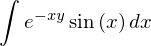

In [73]:
g = sin(x) * exp(-x*y)
I6 = Integral(g, x)
I6

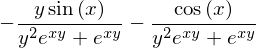

In [74]:
G = I6.doit()
G

In [75]:
G.diff(x) == g

False

In [76]:
G.diff(x).simplify() == g

True